# Week 7 Problem 2

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, March 05, 2018

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from nose.tools import assert_equal, assert_true, assert_false, assert_almost_equal
import numpy.testing as npt


The cell below reads in a simulated dataset with the features a, b, and c.

In [3]:
df = pd.read_csv('/home/data_scientist/data/misc/sim.data')
df.drop('y', axis=1, inplace=True)
df.head()

,a,b,c
0,0.004539,0.818678,194.381891
1,0.001367,0.243724,245.378577
2,1.579454,0.465842,849.943583
3,7.189778,0.456895,129.707932
4,97.743634,0.319419,120.998294


### Problem 2.1

Complete the function *dim_red* by scaling the features using StandardScaler with the default arguments. Apply PCA on the Standardize features and keep 2 components. Return the Simulated features after dimensionality reduction has been applied. Set the random_state argument to 0 where applicable.

In [4]:
def dim_red(df):
    '''
    Parameters
    ----------
    df: dataframe containing simulated features
    
    Returns
    -------
    Simulated features aftter dimensionality reduction is applied (numpy array)  
    '''  
    # YOUR CODE HERE
    features = StandardScaler().fit_transform(df)
    pca = PCA(n_components=2, random_state=0)
    
    features = pca.fit_transform(features)
    
    return features

In [5]:
X = dim_red(df)

assert_true(type(X) == type(np.ndarray(1)), msg='X should be numpy array')

# Testing several slices of the reduced data to the solutions
npt.assert_almost_equal(X[0:5], [[0.12627973557817346, 0.4621687961810338], [-0.9135872587685385, -0.8132069711362879], [-1.530782149412931, 1.188177150531928], [-0.2939093426545699, -0.5741698055176576], [0.420603364572216, -0.9293218565811089]], decimal=2)
npt.assert_almost_equal(X[35:45], [[0.2978649250237335, 1.3892830818084219], [-0.9406442486238737, -0.13857068402350664], [-0.08683409108590956, -0.7454495577714111], [-0.425314974609004, 1.1491830779931218], [0.41561705119111975, 0.9621868279003907], [-0.2953903481572047, -1.1918403046002433], [0.08072687502672446, 0.21491687896580988], [0.05822079752374657, -1.1380298337265868], [0.06549216991966947, -0.1222797223009839], [-1.0675766274588536, 1.2265185147892819]], decimal=2)
npt.assert_almost_equal(X[980:999], [[-2.2381545248554215, 0.3624533271910332], [-0.837584200746159, -0.8140721442522993], [-0.16760012299206772, -0.7317924168832775], [-0.4837267972081887, -1.5180344530048977], [1.9980255935307614, -1.0434244702404938], [-0.102771927876059, -0.11571455240233111], [-2.2260345152049483, 0.0104548580852915], [0.02606058456483472, -0.1109181874454961], [-0.3081168504289668, 0.7702018501614728], [-0.12855296017780404, 1.3482927491543821], [-0.7570488668013287, -0.3224289748501112], [0.8926478982460893, 1.6857495994548832], [-0.14067229454655, 1.3446531821607808], [-1.431471649243388, -0.509571530733033], [-1.2095818164276697, 0.2702481583621552], [-0.8770918680961779, -0.1345225867543651], [-0.3808425257177419, 0.7859321575625291], [0.20588556771960098, 0.019155762839033096], [0.058427878148025136, -0.39117508856064886]], decimal=2)


### Problem 2.2

Complete function *den_cluster* by taking the reduced features from Problem 2.1 and fitting a Density-Based Spatial Clustering of Applications with Noise (DBSCAN) model with the reduced features. Use the eps function parameter in your DBSCAN model. Return the cluster labels for each row in *X* that the model was fit on.

In [6]:
def den_cluster(X, eps=0.22):
    '''
    Parameters
    ----------
    X: numpy array containing reduced features
    eps: floating number containing max distance between 2 samples for them to be considered as in the same neighborhood
    
    Returns
    -------
    cluster labels  (numpy array)
    '''
    # YOUR CODE HERE
    db = DBSCAN(eps=eps)
    mdl = db.fit(X)
    
    return mdl.labels_
    
    

In [7]:
cluster_labels = den_cluster(X, 0.22)
assert_true(type(cluster_labels) == type(np.ndarray(1)), msg='should be numpy array')
npt.assert_equal(cluster_labels, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

cluster_labels2 = den_cluster(X, 0.23)
assert_true(type(cluster_labels2) == type(np.ndarray(1)),  msg='should be numpy array')
npt.assert_equal(cluster_labels2, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Problem 2.3

Complete problem 2.3 by finishing the function *plot*. Do the following:
- Create a figure and axes object using subplots from matplotlib.pyplot.
- Use [seaborn's color_palette](https://seaborn.pydata.org/tutorial/color_palettes.html) to generate enough colors for each of the clusters found by the DBSCAN model.
    - use the hls color space
- Iterate from -1 to the number of clusters found
- For each iteration use the *plot* function from your axes object to plot all of the points from that cluster
    - set the marker to either '.' or 'o' 
    - and the linestyle to 'None'. 
    - Set the color by selecting  the appropriate indices from the color palette. i.e: iteration 0 should select index 0 from the color palette, iteration 1 should select index 1 from the color paletter, and so on.
- set a label for the x and y axes
- set a title which should be named: "*eps*: [eps value]", where the eps value is a float passed into the plot function.
- create a legend. Each item in the legend should be named after values of the cluster label. i.e: when you plot points that have the cluster label -1 these points should have the label -1, for points that belong to the  next cluster after -1 (0) they should be labeled as 0, and so on. See the example plot below.

*When setting colors for a particular cluster, the label -1 should have the color of the first index, the label 0 should have the color of the second index, etc.*

Here is an example of what your plot should look like: ![wk7p2.3.png](https://i.imgur.com/FDEOB65.png[/img]) 

Here are a few hints:
- You may find it easier to convert the reduced features from a numpy array to dataframe. *You may have to change the shape of the data, if you follow this route.

In [42]:
def plot(X , labels, eps):
    '''
    Parameters
    ----------
    X: numpy array containing reduced features
    labels: numpy array containing cluster labels
    eps: floating number containing max distance between 2 samples for them to be considered as in the same neighborhood
    
    Returns
    -------
    axes object
    '''
    # YOUR CODE HERE
    n = len(sorted(list(set(labels))))
    clr = sns.color_palette("hls", n-1)
    lbls = sorted(list(set(labels)))[:-1]
    cols = ['PCA1', 'PCA2']
    
    db = DBSCAN(eps=eps)
    mdl = db.fit(X)
    
    dt = pd.DataFrame(X, columns=cols)
    
    fig, ax = plt.subplots(figsize=(12,8))
    
    
    for idx in lbls:
       
        tmp_df = dt[labels == idx]
        plt.plot(tmp_df['PCA1'], tmp_df['PCA2'],
                  color=clr[idx+1], label=lbls[idx+1], 
                   alpha=0.75,  marker = '.', linestyle='None')

        ax.set_xlabel('PCA Feature 1')
        ax.set_ylabel('PCA Feature 2')
        ax.set_title('eps: {}'.format(eps))
        ax.legend(bbox_to_anchor=(1,1), loc=1)
    
    return ax


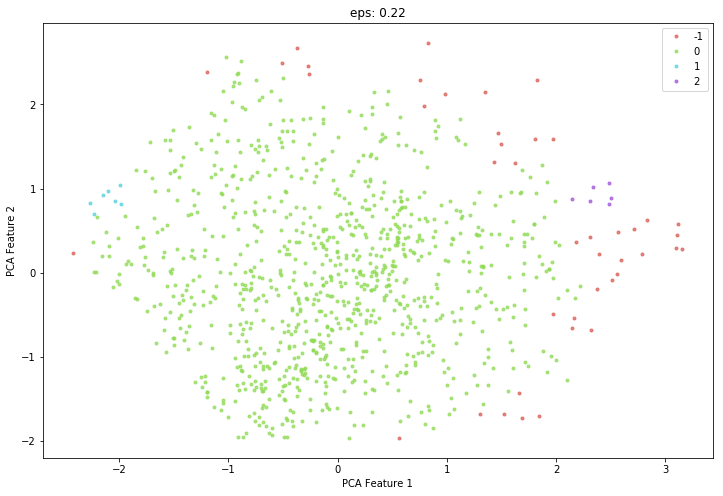

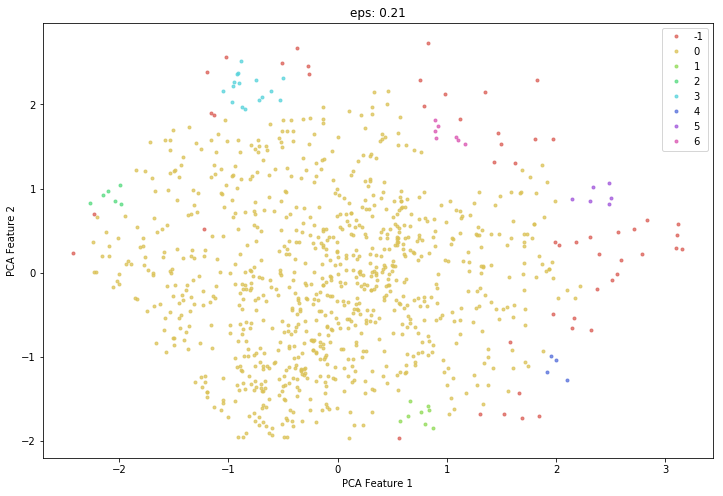

In [43]:
cluster_labels = den_cluster(X, eps=0.22)

ax = plot(X , cluster_labels, 0.22)
assert_true(isinstance(ax, mpl.axes._subplots.Axes), msg='return an axes object')

assert_false(ax.get_title() == '', msg='Set Your title')
assert_false(ax.get_ylabel() == '', msg='Label the y axis')
assert_false(ax.get_xlabel() == '', msg='Label the x axis')

assert_false(ax.get_lines() == 0, msg= "Use the plot function not the scatter function")
assert_true(len(ax.get_lines()) == 4, msg='You should have called the plot function 4 times')

assert_equal(ax.get_title(), 'eps: 0.22', msg="The title should be eps: 0.22")

assert_true(isinstance(ax.get_legend(), mpl.legend.Legend), msg='Create a legend')
assert_false(len(ax.get_legend_handles_labels()) == 0, msg="Set your legend")
assert_equal(ax.get_legend_handles_labels()[1], ['-1', '0', '1', '2'])

npt.assert_almost_equal((0.8599, 0.3711, 0.3399), ax.get_lines()[0].get_color(), decimal=2)
npt.assert_almost_equal((0.5688, 0.8599, 0.3399), ax.get_lines()[1].get_color(), decimal=2)
npt.assert_almost_equal((0.3399, 0.8287, 0.8599), ax.get_lines()[2].get_color(), decimal=2)
npt.assert_almost_equal((0.6311, 0.3399, 0.8599), ax.get_lines()[3].get_color(), decimal=2)


# Generating new clusters and testing the plot function again.
cluster_labels2 = den_cluster(X, eps=0.21)
ax2 = plot(X , cluster_labels2, 0.21)
assert_true(isinstance(ax2, mpl.axes._subplots.Axes), msg='return an axes object')

assert_false(ax2.get_title() == '', msg='Set Your title')
assert_false(ax2.get_ylabel() == '', msg='Label the y axis')
assert_false(ax2.get_xlabel() == '', msg='Label the x axis')

assert_false(ax2.get_lines() == 0, msg= "Use the plot function not the scatter function")
assert_true(len(ax2.get_lines()) == 8, msg='You should have called the plot function 8 times')

assert_equal(ax2.get_title(), 'eps: 0.21', msg="The title should be eps: 0.21")

assert_true(isinstance(ax2.get_legend(), mpl.legend.Legend), msg='Create a legend')
assert_false(len(ax2.get_legend_handles_labels()) == 0, msg="Set your legend")
assert_equal(ax2.get_legend_handles_labels()[1], ['-1', '0', '1', '2', '3', '4', '5', '6'])

npt.assert_almost_equal((0.8599, 0.3711, 0.3399), ax2.get_lines()[0].get_color(), decimal=2)
npt.assert_almost_equal((0.8599, 0.761, 0.3399), ax2.get_lines()[1].get_color(), decimal=2)
npt.assert_almost_equal((0.5688, 0.8599, 0.3399), ax2.get_lines()[2].get_color(), decimal=2)
npt.assert_almost_equal((0.3399, 0.8599, 0.5012), ax2.get_lines()[3].get_color(), decimal=2)
npt.assert_almost_equal((0.3399, 0.8287, 0.8599), ax2.get_lines()[4].get_color(), decimal=2)
npt.assert_almost_equal((0.3399, 0.4387, 0.8599), ax2.get_lines()[5].get_color(), decimal=2)
npt.assert_almost_equal((0.6311, 0.3399, 0.8599), ax2.get_lines()[6].get_color(), decimal=2)
npt.assert_almost_equal((0.8599, 0.3399, 0.6987), ax2.get_lines()[7].get_color(), decimal=2)
